# Data Analysis Interview Challenge

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [83]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import re

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [84]:
# Read json file
df = pd.read_json('logins.json').set_index('login_time')
df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [85]:
#Check date column properties, etc. 
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [86]:
# Add a counter column

df.index = pd.to_datetime(df.index)
df['logged'] = 1

### Quarter-Hour

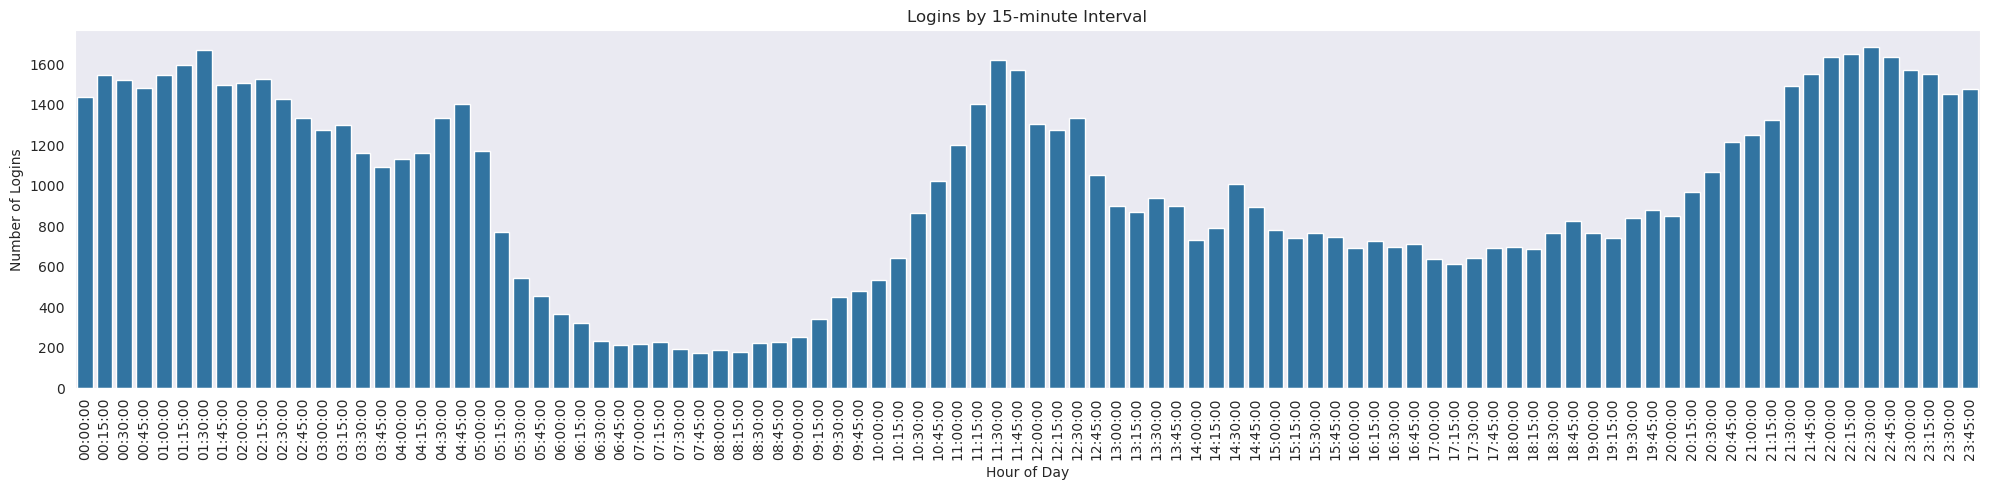

In [87]:
# Count total logins by quarter hour

logins_by_quarter = df.groupby(df.index.floor('15min').time).sum()

# PLot logins by quarter hour

plt.figure(figsize=(20, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_quarter.index,
            y=logins_by_quarter['logged'] )
plt.title('Logins by 15-minute Interval')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [88]:
# Quarter hourly logins

logins_quarterhourly = df.resample('15min').count()

In [89]:
# Verify datetime index 

logins_quarterhourly.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15min')

In [90]:
# Check for nulls 

logins_quarterhourly.isna().sum()

logged    0
dtype: int64

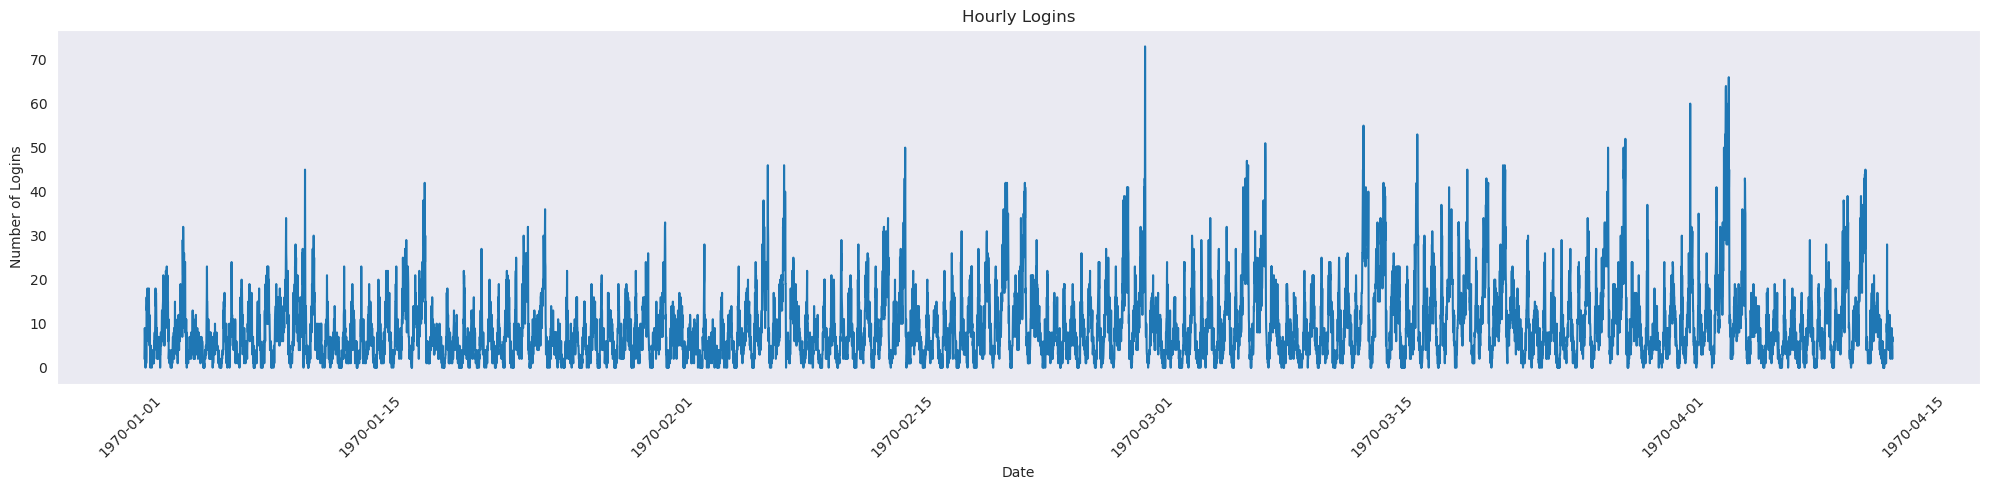

In [91]:
# Plot the hourly logins

plt.figure(figsize=(20, 5))
sns.lineplot(x=logins_quarterhourly.index, y=logins_quarterhourly['logged'])
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

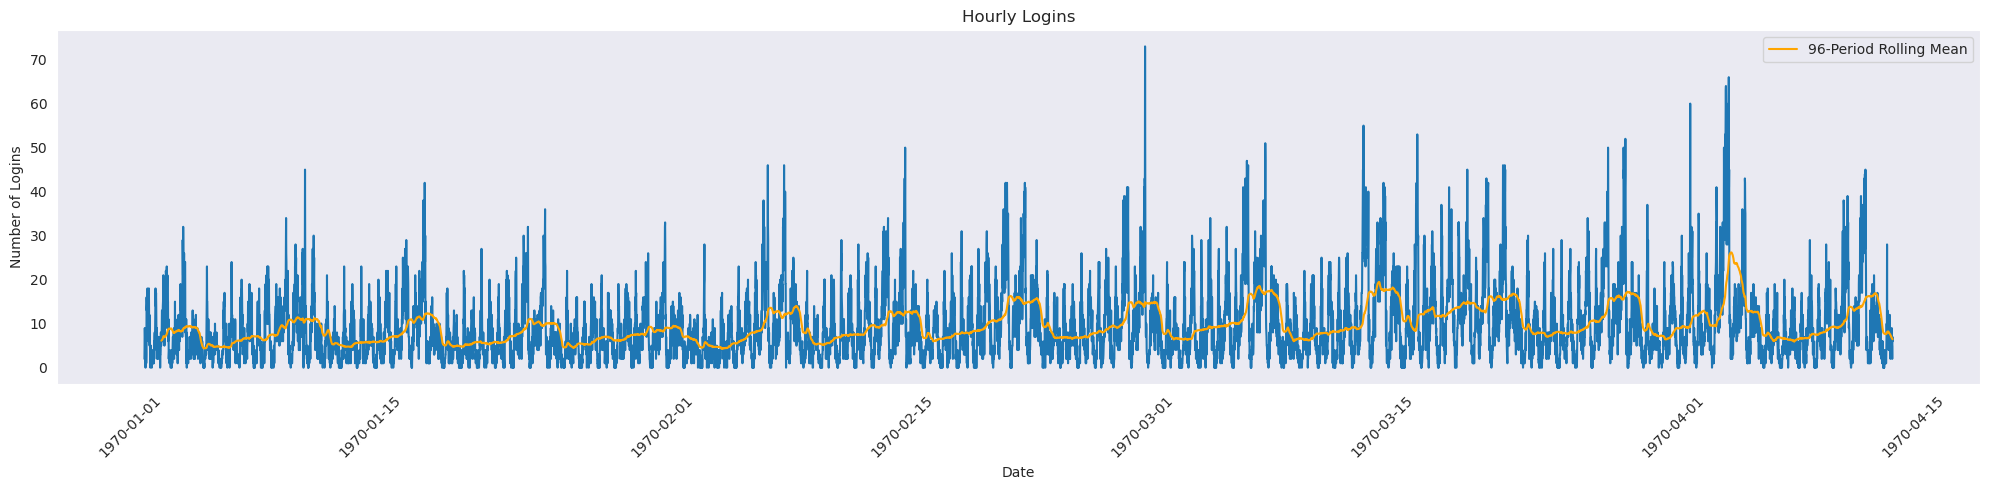

In [92]:
# Quarter hourly logins with rolling mean

trend = logins_quarterhourly.rolling(window=96).mean()

plt.figure(figsize=(20, 5))
sns.lineplot(x=logins_quarterhourly.index, y=logins_quarterhourly['logged'])
sns.lineplot(x=trend.index, y=trend['logged'], color='orange', label='96-Period Rolling Mean')
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# Date and Time with the most logins

print( f'Date and time with the highest logins: {logins_quarterhourly['logged'].idxmax()}' )

Date and time with the highest logins: 1970-03-01 04:30:00


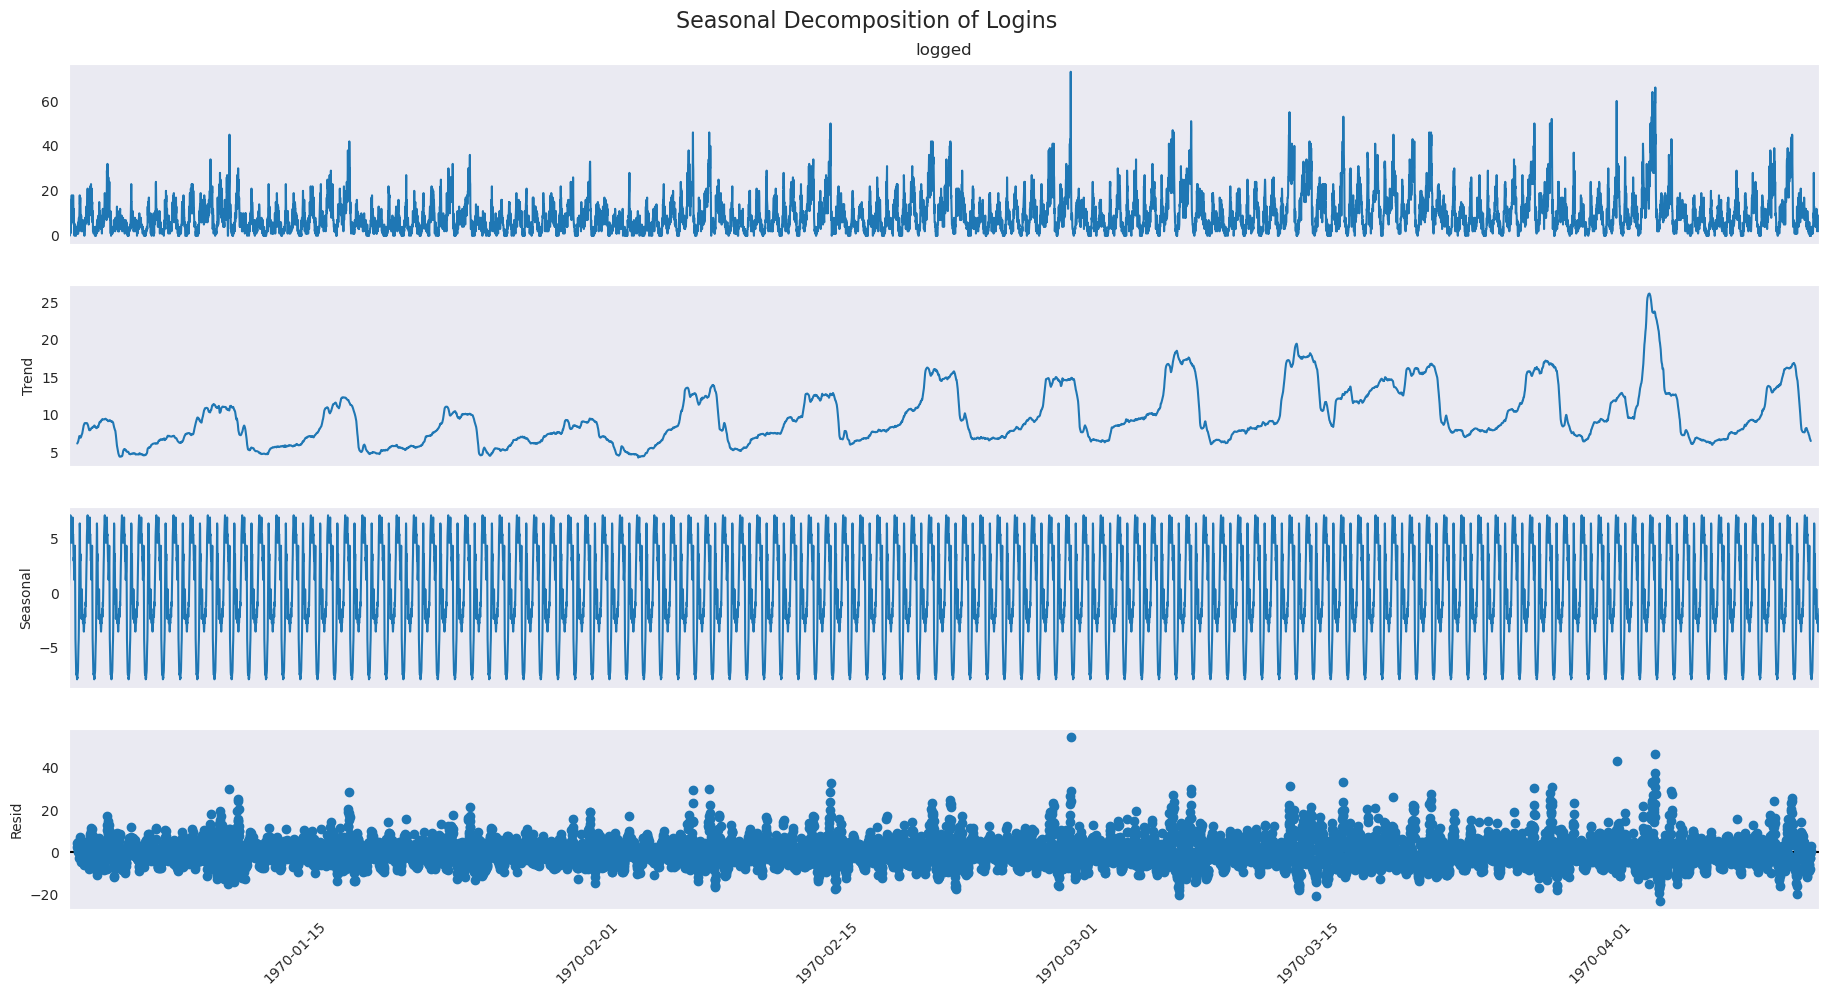

In [94]:
# Seasonal decomposition of quarter hourly logins data

from statsmodels.tsa.seasonal import seasonal_decompose

# use period = 96 quarter hours in a day. 
decomposition = seasonal_decompose(logins_quarterhourly['logged'], model='additive', period=96)
fig = decomposition.plot()
fig.set_size_inches(20, 10)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.show() 

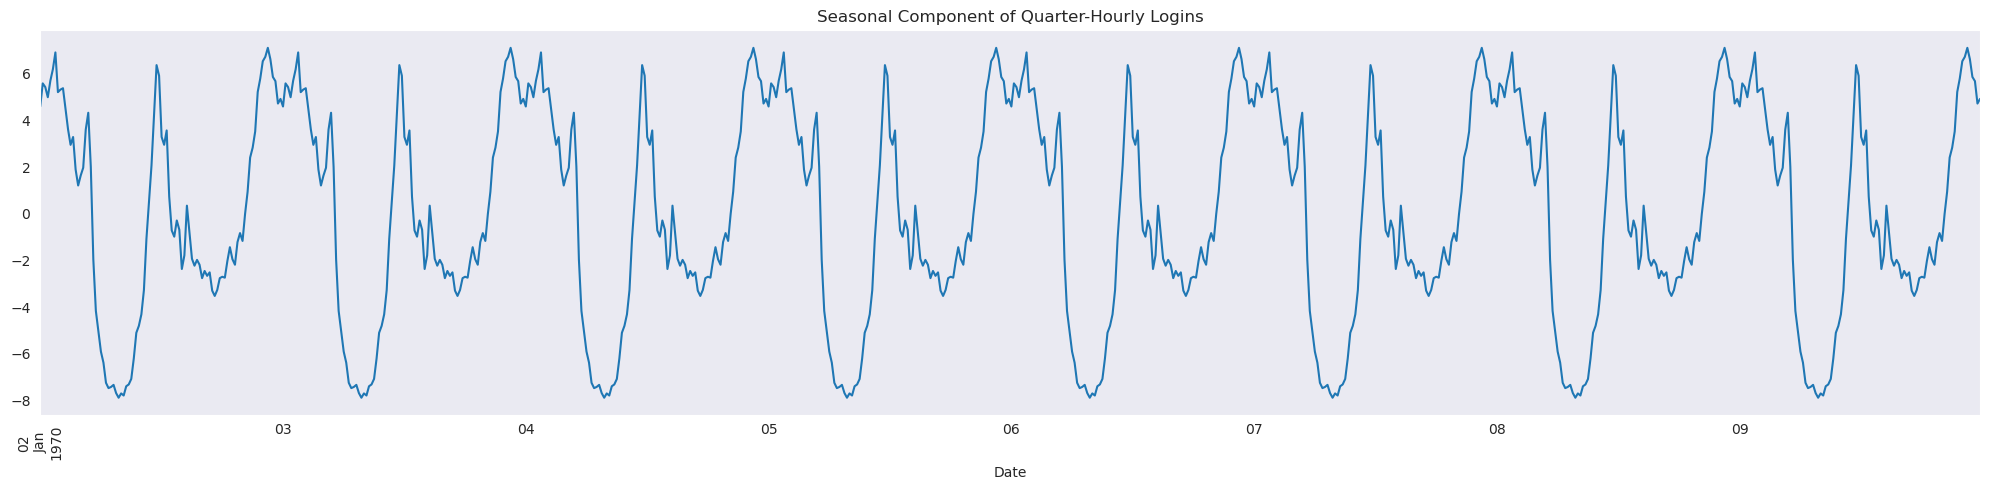

In [95]:
# Zoom in on the seasonal component of the quarter hourly logins within a 7-day period

plt.figure(figsize=(20, 5))
decomposition.seasonal[16:784].plot()
plt.title('Seasonal Component of Quarter-Hourly Logins')
plt.xlabel('Date')
# plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [96]:
def adf_test(series):
    '''
    UDF: Perform Augmented Dickey-Fuller test to check for stationarity
    Parameters
    ----------
    series : pd.Series
        The time series to test for stationarity.
    Returns
    -------
    None. Prints the ADF test statistic, p-value, number of lags used, and number of observations used.
    Also prints whether the null hypothesis of non-stationarity is rejected or not.
    
    '''
    result = adfuller(series)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', '#Observations Used']
    for label, val in zip(labels, result):
        print(f'{label} : {val}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis - the time series is stationary")
    else:
        print("Fail to reject the null hypothesis - the time series is non-stationary")

ADF Test Statistic : -10.337954309060434
p-value : 2.7323966542231624e-18
#Lags Used : 38
#Observations Used : 9749
Reject the null hypothesis - the time series is stationary


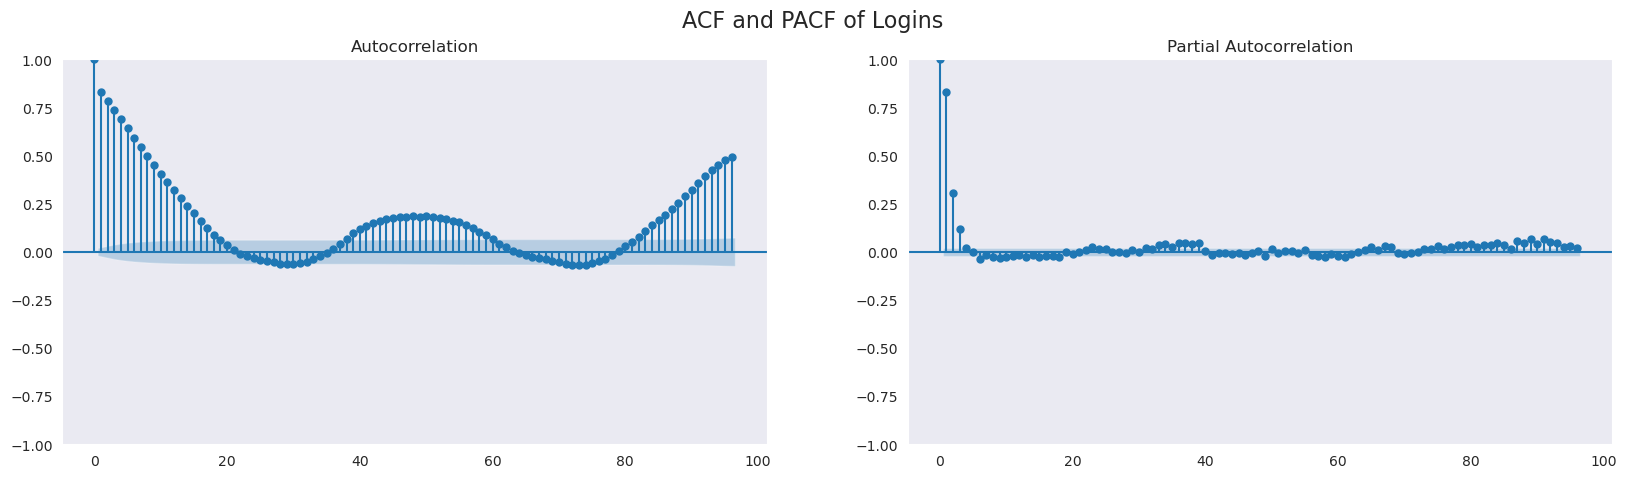

In [97]:
# Perform ADF test on the quarter hourly logins

adf_test(logins_quarterhourly['logged'])


# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(logins_quarterhourly['logged'], lags=96, ax=ax[0])
plot_pacf(logins_quarterhourly['logged'], lags=96, ax=ax[1])
plt.suptitle('ACF and PACF of Logins', fontsize=16)
plt.show()

Hourly

Average logins per hour:  38.0


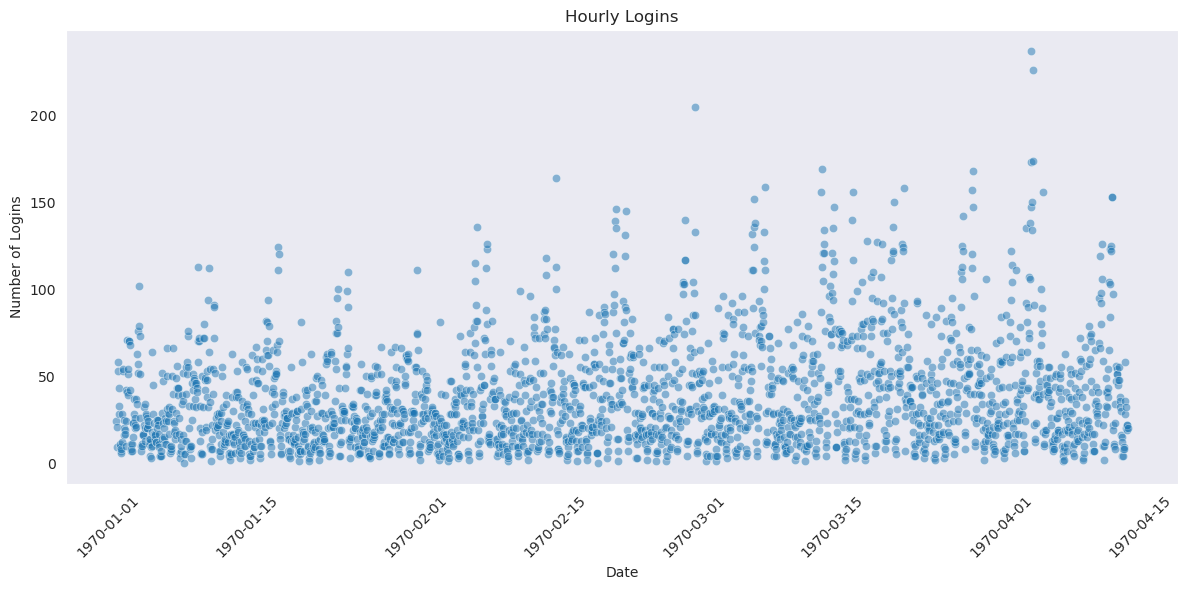

In [98]:
# Resample to hourly - Logins per hour

logins_hourly = df.resample('h').count()

avg_logins_hourly = round(logins_hourly['logged'].mean(),0)
print('Average logins per hour: ', avg_logins_hourly)

# Plot the hourly counts
sns.set_style('dark', {'axes.grid': False})
plt.figure(figsize=(12, 6))
sns.scatterplot(x=logins_hourly.index, y=logins_hourly['logged'], marker='o', alpha=0.5)
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

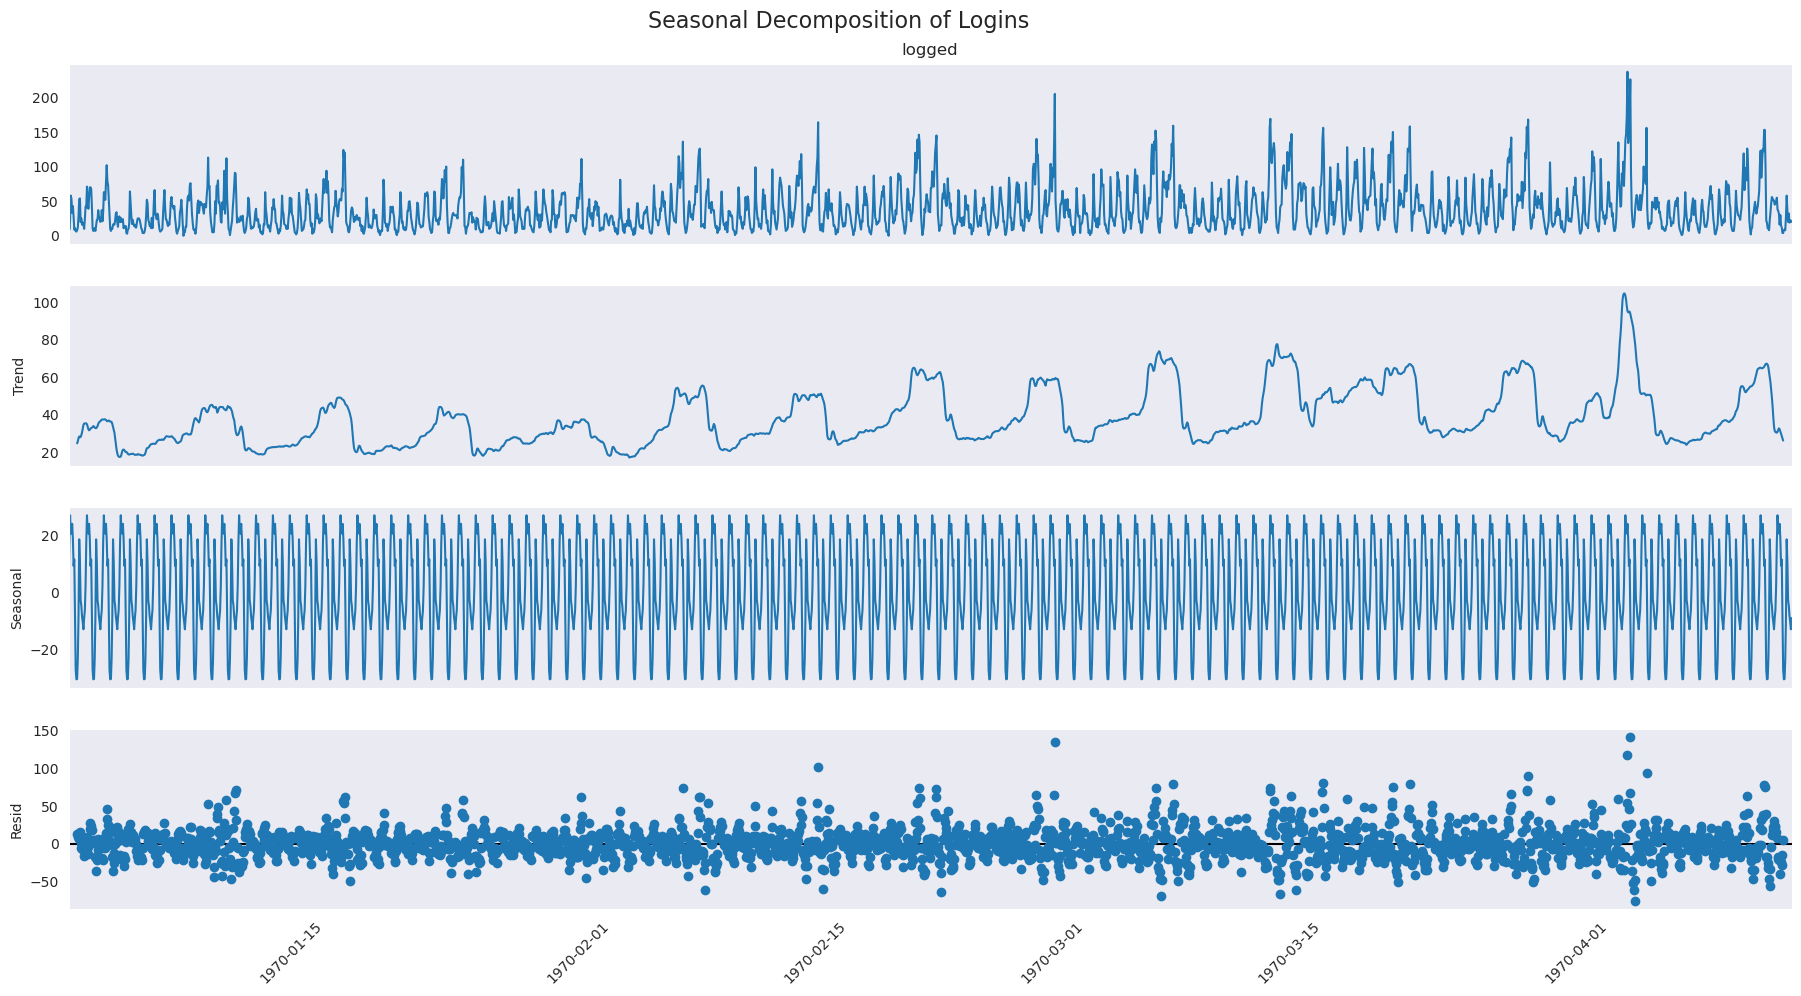

In [99]:
# Seasonal decomposition - Hourly logins

# use period = 24 hours. 
decomposition = seasonal_decompose(logins_hourly['logged'], model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(20, 10)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
# plt.xlim(logins_hourly.index[4], logins_hourly.index[172])
plt.xticks(rotation=45)
plt.show() 

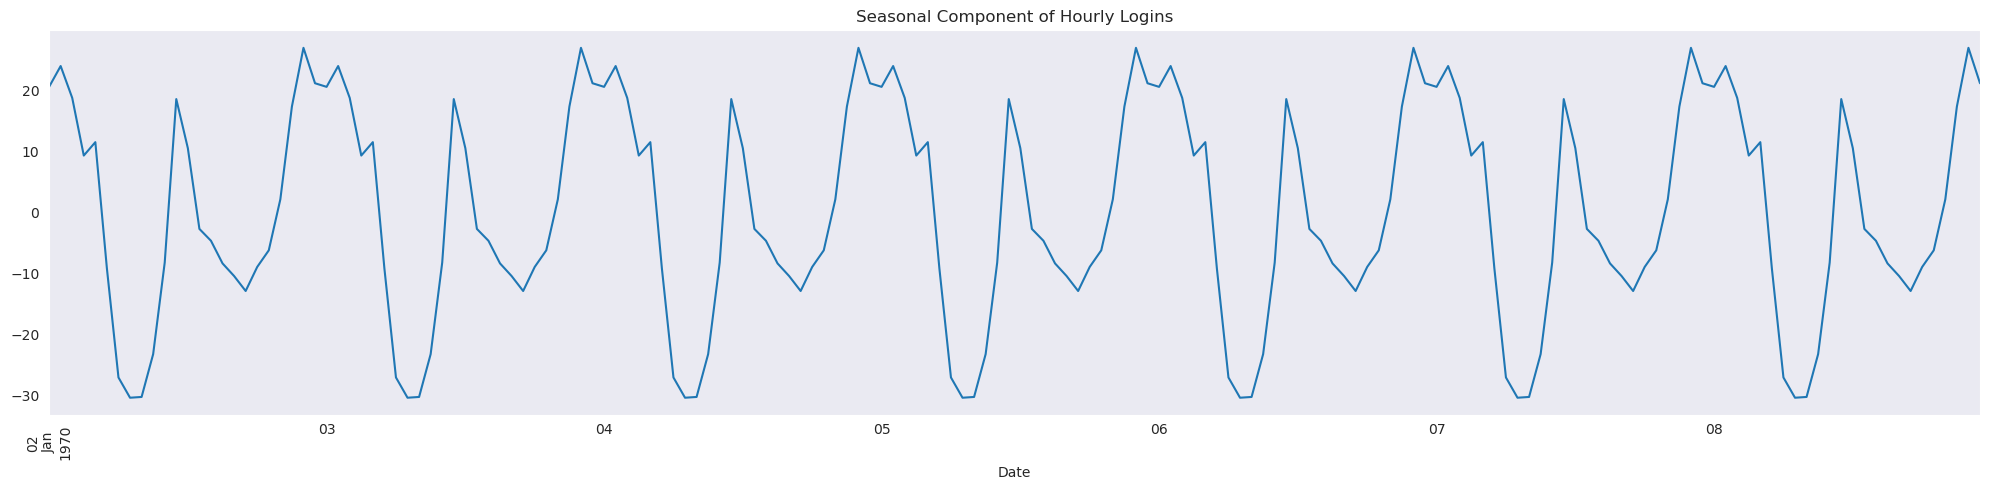

In [100]:
# Zooming in on the seasonal component for a 7-day period


plt.figure(figsize=(20, 5))
decomposition.seasonal[4:172].plot()
plt.title('Seasonal Component of Hourly Logins')
plt.xlabel('Date')
# plt.ylabel('Seasonal Component')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ADF Test Statistic : -5.4616429583400645
p-value : 2.510922984630461e-06
#Lags Used : 25
#Observations Used : 2421
Reject the null hypothesis - the time series is stationary


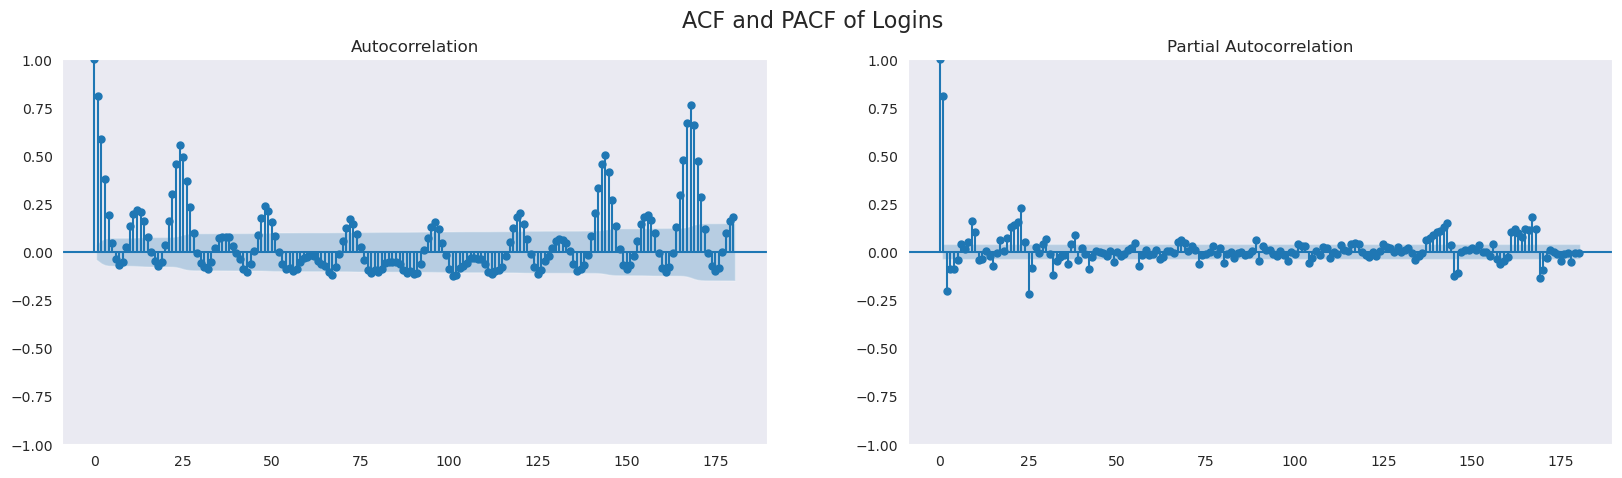

In [101]:
# Stationarity test + ACF + PACF on hourly logins

adf_test(logins_hourly['logged'])

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(logins_hourly['logged'], lags=180, ax=ax[0])
plot_pacf(logins_hourly['logged'], lags=180, ax=ax[1])
plt.suptitle('ACF and PACF of Logins', fontsize=16)
plt.show()

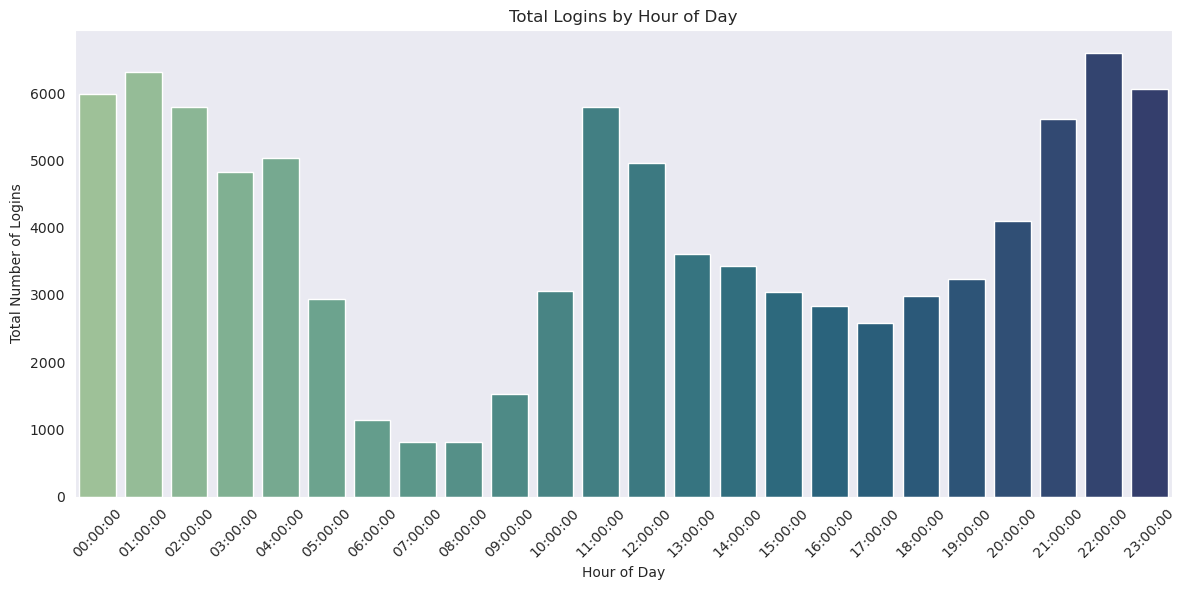

In [102]:
# Total logins by hour

logins_by_hour = logins_hourly.groupby(logins_hourly.index.hour).sum()

# convert index to time

logins_by_hour.index = pd.to_datetime(logins_by_hour.index, format='%H').time

# Logins by hour of day

plt.figure(figsize=(12, 6))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_hour.index, y=logins_by_hour['logged'], palette='crest', hue=logins_by_hour.index, legend=False)
plt.title('Total Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


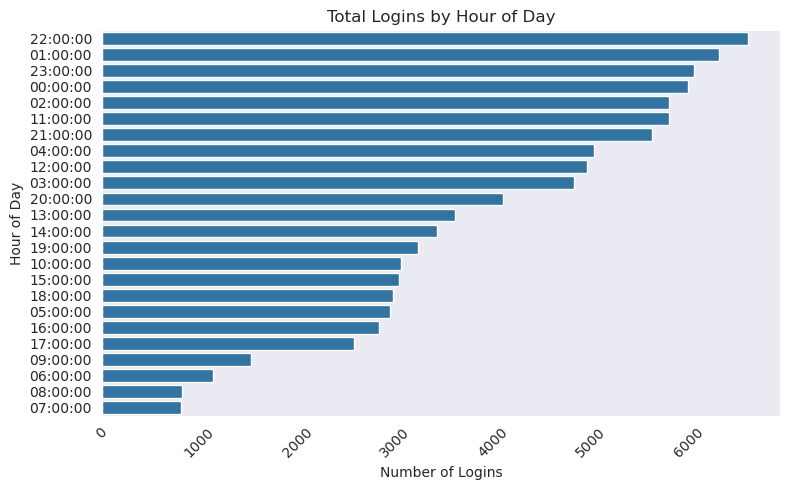

In [103]:
#  Total logins by hour of day - sorted

plt.figure(figsize=(8, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(y=logins_by_hour.sort_values('logged', ascending=False).index,
            x=logins_by_hour.sort_values('logged', ascending=False)['logged'] )
plt.title('Total Logins by Hour of Day')
plt.ylabel('Hour of Day')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
# Extract Date + Time Variables

logins_hourly['year'] = logins_hourly.index.year
logins_hourly['month'] = logins_hourly.index.month
logins_hourly['day'] = logins_hourly.index.day
logins_hourly['hour'] = logins_hourly.index.hour
logins_hourly['weekday'] = logins_hourly.index.day_name()
logins_hourly['weekday_numeric'] = logins_hourly.index.weekday

# 5 & 6 is for Saturday and Sunday
logins_hourly['is_weekend'] = logins_hourly.index.weekday > 4

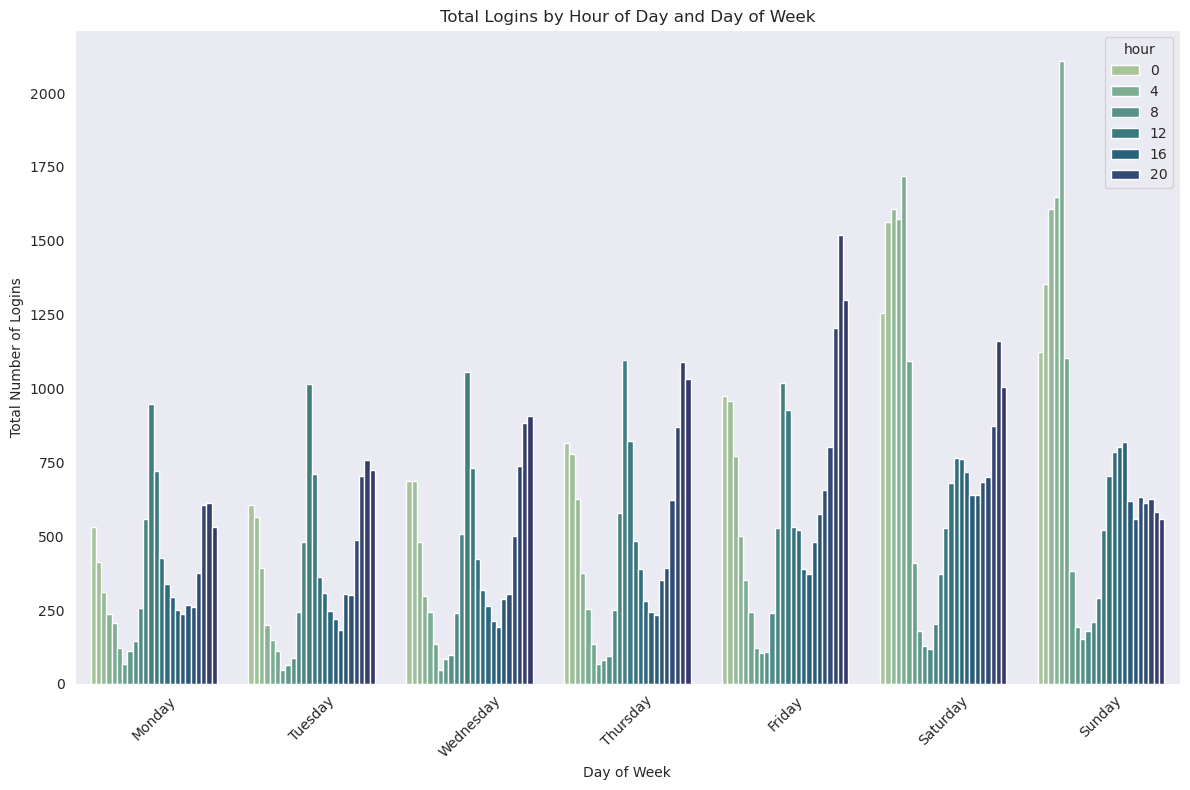

In [105]:
# Plot the hourly logins by weekday and hour of the day.

gby_weekday_hour = logins_hourly.groupby([logins_hourly['weekday_numeric'], logins_hourly['hour']])['logged'].agg('sum').reset_index()
gby_weekday_hour['weekday'] = gby_weekday_hour['weekday_numeric'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
gby_weekday_hour = gby_weekday_hour.reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x=gby_weekday_hour['weekday'], y=gby_weekday_hour['logged'], hue=gby_weekday_hour['hour'], palette='crest')
plt.title('Total Logins by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [110]:
pvt_login_activity = gby_weekday_hour.pivot(index='hour', columns='weekday_numeric', values='logged')



In [113]:
pvt_login_activity.index = pd.to_datetime(pvt_login_activity.index, format='%H').time

In [ ]:
pvt_login_activity.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
00:00:00,531,607,687,816,975,1254,1123
01:00:00,414,566,686,777,957,1562,1355
02:00:00,312,394,482,625,771,1608,1608
03:00:00,236,198,299,375,502,1574,1647
04:00:00,206,149,245,255,353,1719,2107
05:00:00,121,113,135,136,245,1093,1102
06:00:00,66,46,48,67,121,408,382
07:00:00,111,64,84,81,105,178,192
08:00:00,147,88,99,95,109,127,153
09:00:00,256,242,240,251,240,118,180


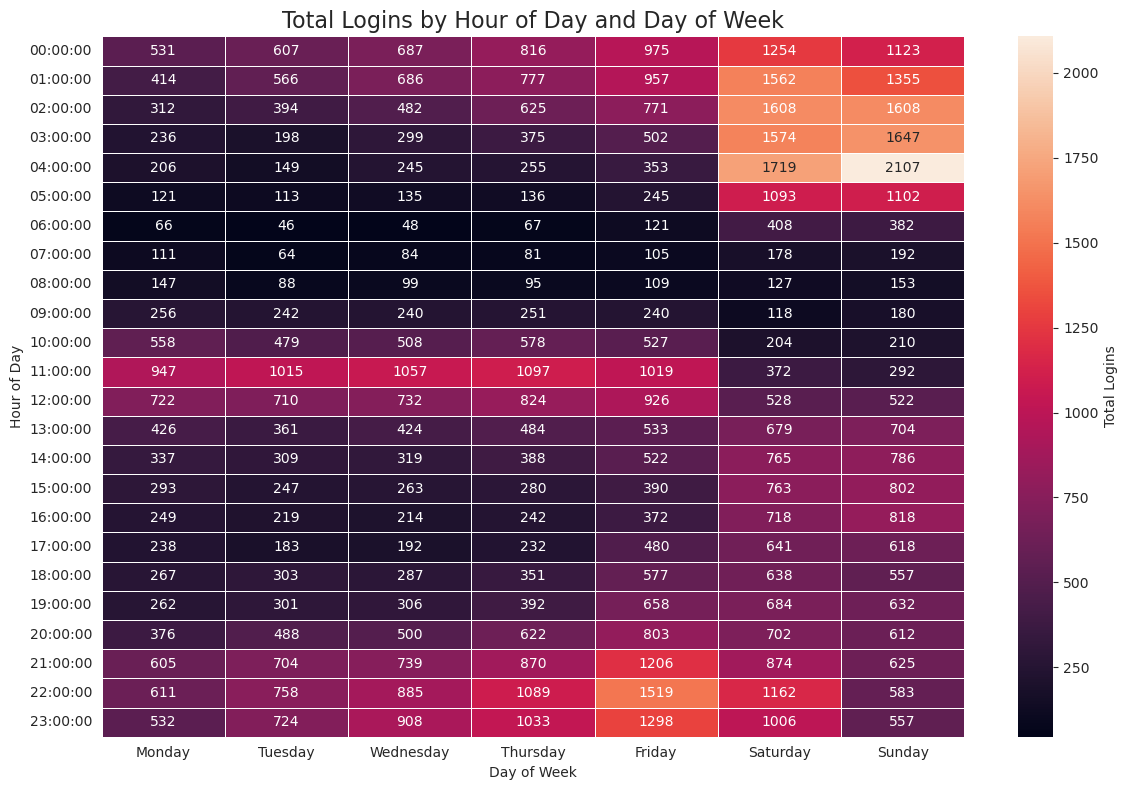

In [120]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=pvt_login_activity, annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Logins'})

plt.title('Total Logins by Hour of Day and Day of Week', fontsize=16)
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

### Custom Daily

In [189]:
# Check if each daily record is complete - have 24 hours per day

daily_hour_count = logins_hourly.groupby(logins_hourly.index.date)['logged'].agg({'count', 'sum'})
daily_hour_count['count'].value_counts()

count
24    101
4       1
19      1
Name: count, dtype: int64

In [190]:
# Get the average number of logins per day

avg_login_daily = round(daily_hour_count['sum'].mean(),0)
print('Average daily logins: ', avg_login_daily)

Average daily logins:  904.0


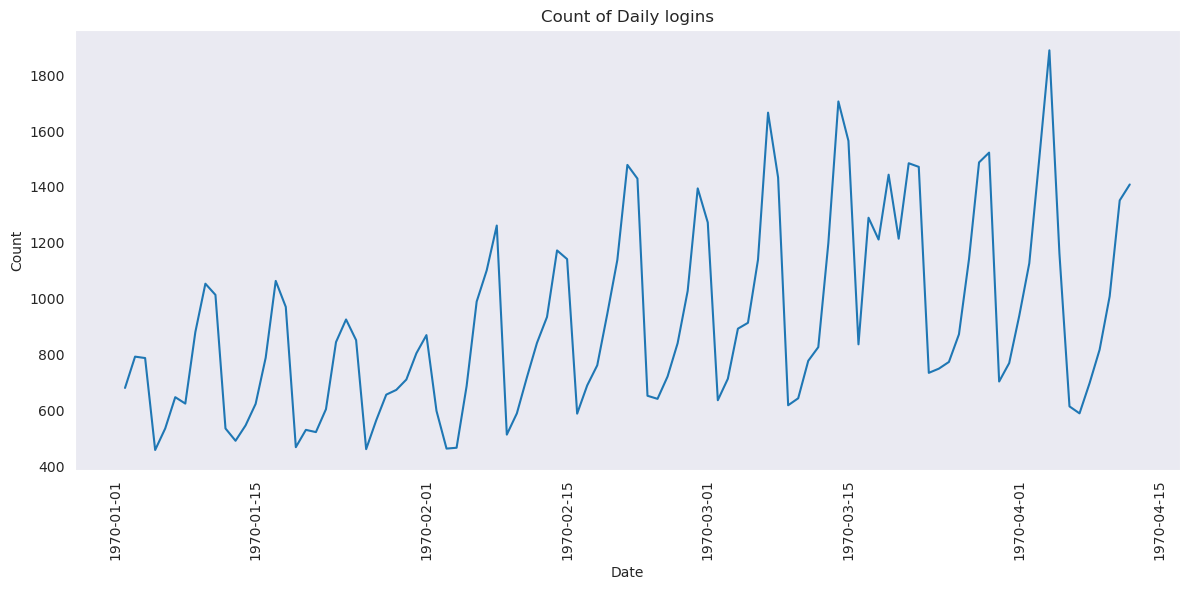

In [191]:
# Drop incomplete daily logins dates with less than 24 hours of logins recorded. 

daily_hour_count = daily_hour_count[daily_hour_count['count'] == 24]

# Plot total count logins daily (only those with 24 hours of data)

sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_hour_count, x=daily_hour_count.index, y='sum', markers='o',)
plt.title('Count of Daily logins')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

### Standard Daily


In [192]:
# Resample to daily

logins_daily = df.resample('D').count()

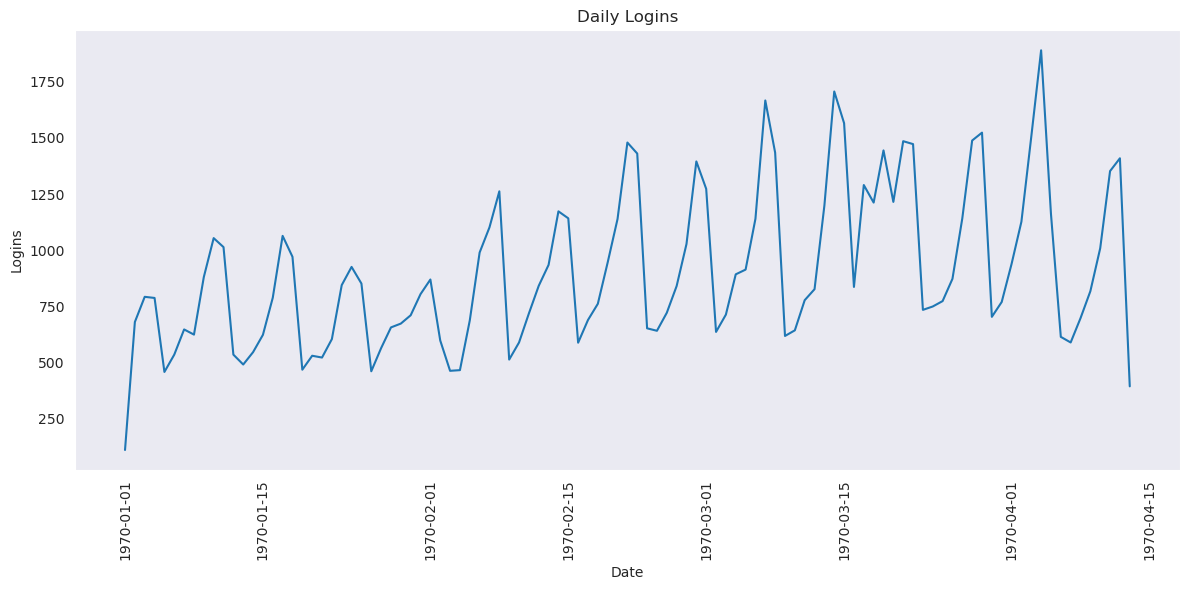

In [193]:
# Plot daily logins

sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.lineplot(x=logins_daily.index, y=logins_daily['logged'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Logins')
plt.title('Daily Logins')
plt.tight_layout()
plt.show()

In [194]:
logins_daily

,logged
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
...,...
1970-04-09,818
1970-04-10,1009
1970-04-11,1352


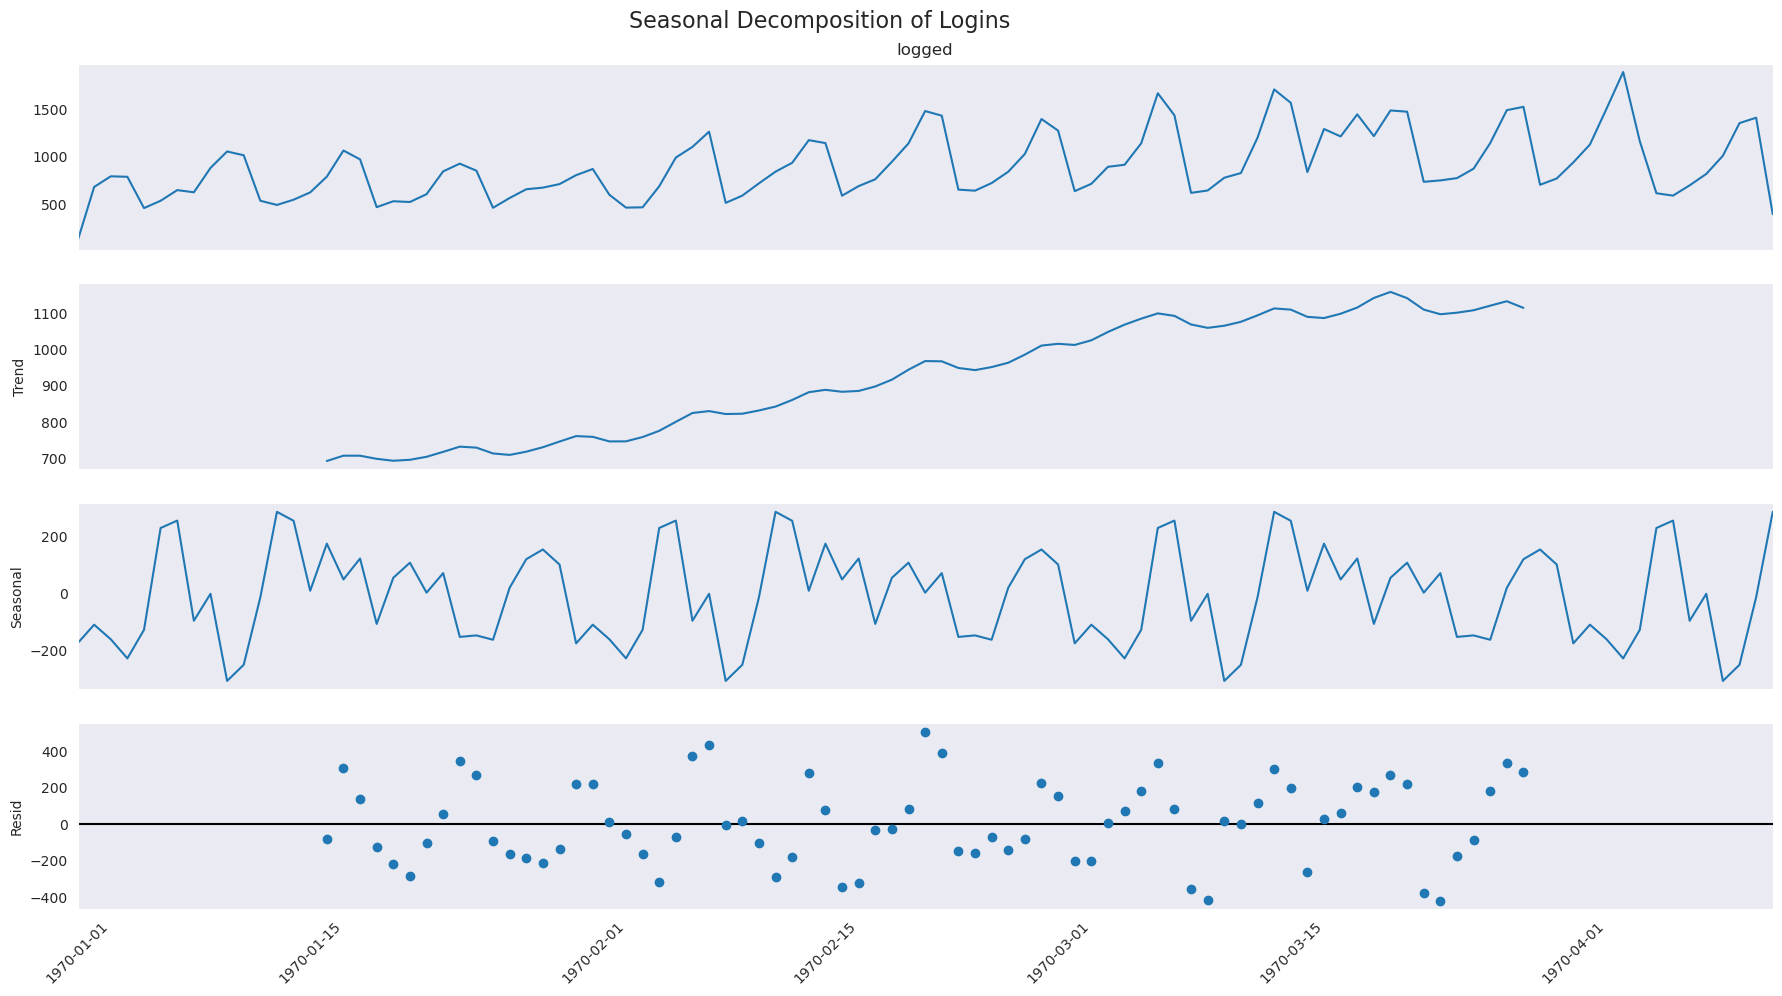

In [195]:
# use period = 30 days. 

decomposition = seasonal_decompose(logins_daily['logged'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(20, 10)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.show() 

ADF Test Statistic : -1.4033164919219885
p-value : 0.5806851218557991
#Lags Used : 13
#Observations Used : 89
Fail to reject the null hypothesis - the time series is non-stationary


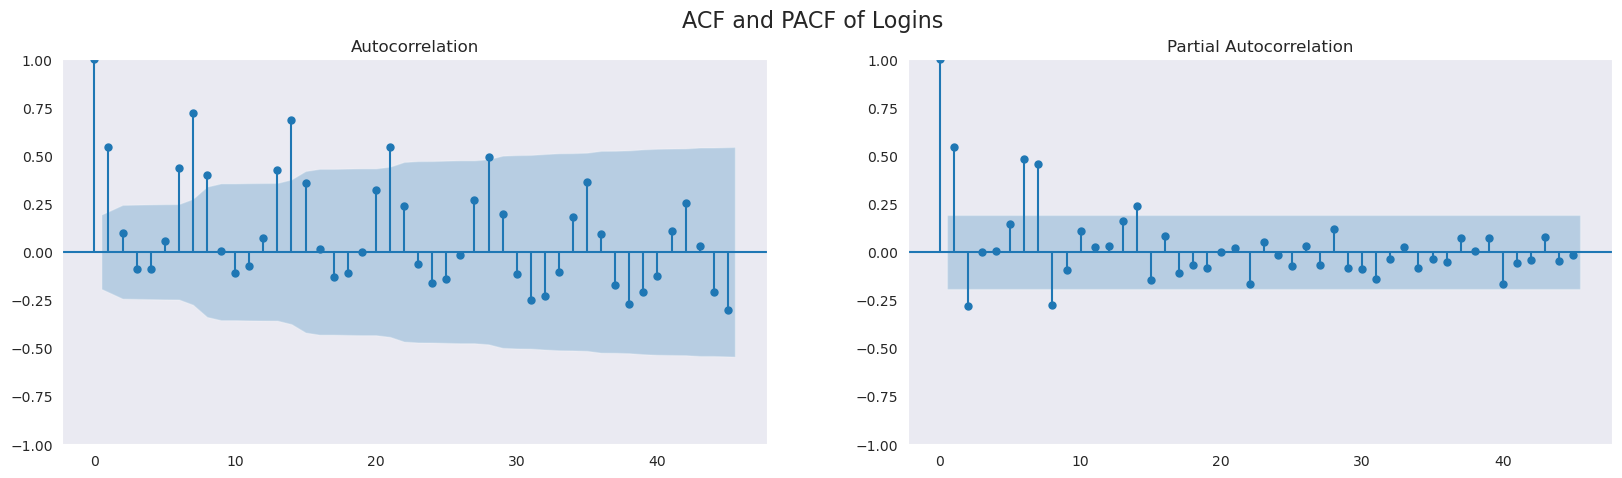

In [196]:

adf_test(logins_daily['logged'])
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(logins_daily['logged'], lags=45, ax=ax[0])
plot_pacf(logins_daily['logged'], lags=45, ax=ax[1])
plt.suptitle('ACF and PACF of Logins', fontsize=16)
plt.show()

In [197]:
logins_by_day = logins_daily.groupby(logins_daily.index.day_name()).sum()
logins_by_day

,logged
login_time,
Friday,15208
Monday,8823
Saturday,19377
Sunday,18167
Thursday,11960
Tuesday,9268
Wednesday,10339


In [ ]:
# Extract Time Variables

logins_daily['year'] = logins_daily.index.year
logins_daily['month'] = logins_daily.index.month
logins_daily['day'] = logins_daily.index.day
logins_daily['weekday'] = logins_daily.index.day_name()
logins_daily['weekday_numeric'] = logins_daily.index.weekday


# 5 & 6 is for Saturday and Sunday
logins_daily['is_weekend'] = logins_daily.index.weekday > 4

logins_daily

,logged,year,month,day,weekday,weekday_numeric,is_weekend
login_time,,,,,,,
1970-01-01,112,1970,1,1,Thursday,3,False
1970-01-02,681,1970,1,2,Friday,4,False
1970-01-03,793,1970,1,3,Saturday,5,True
1970-01-04,788,1970,1,4,Sunday,6,True
1970-01-05,459,1970,1,5,Monday,0,False
...,...,...,...,...,...,...,...
1970-04-09,818,1970,4,9,Thursday,3,False
1970-04-10,1009,1970,4,10,Friday,4,False
1970-04-11,1352,1970,4,11,Saturday,5,True


In [ ]:
# Which day of the week has the most logins

logins_by_day = logins_daily.groupby(['weekday'])['logged'].agg('sum')
logins_by_day = logins_by_day.sort_values(ascending=False)


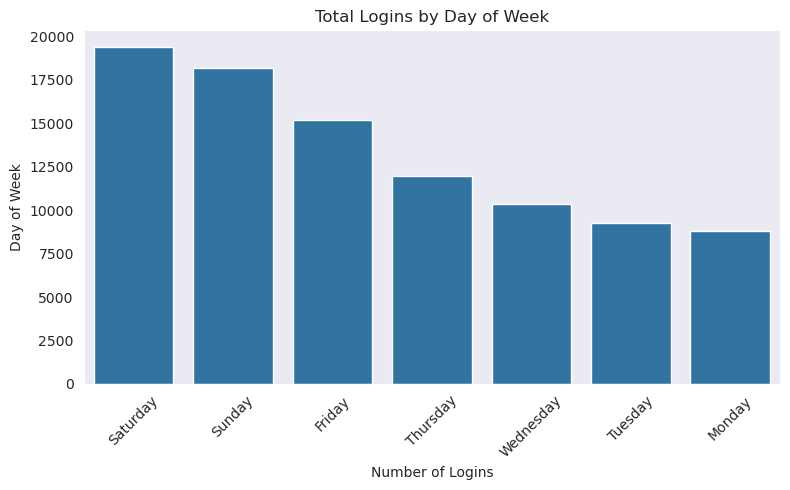

In [202]:
# Plot total logins by day of week

plt.figure(figsize=(8, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_day.index,
            y=logins_by_day.values )
plt.title('Total Logins by Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Standard Weekly

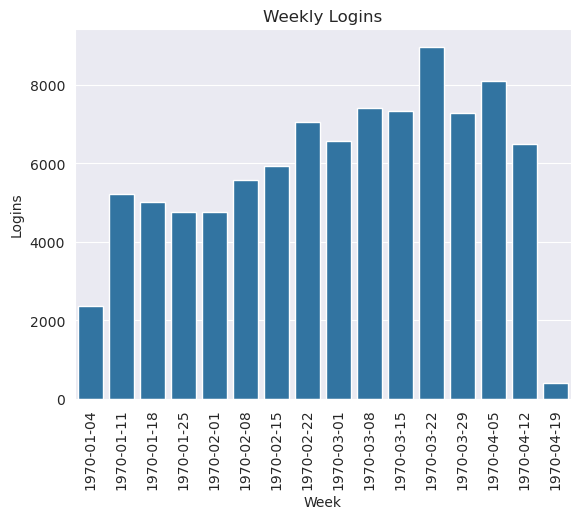

In [43]:
# Resample to weekly

weekly_counts = df.resample('W').count()

# Plot weekly logins

sns.set_style('darkgrid')
sns.barplot(x=weekly_counts.index, y=weekly_counts['logged'])
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Logins')
plt.title('Weekly Logins')
plt.show()